In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pickle
import pandas as pd
from sklearn.impute import SimpleImputer

# Data Collection

In [6]:
data = pickle.load(open('data_without_cluster.pickle',mode='rb'))

# Data preprocessing

In [7]:
data.drop(columns=['Day', 'Month', 'Year', 'HMIS'], inplace=True)

In [8]:
data = data.dropna()

In [9]:
data = data.apply(pd.to_numeric, errors='coerce')

In [10]:
data

,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM)
0,438.09,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0.0,430.0,0.0
1,438.02,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0.0,430.0,0.0
2,438.00,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0.0,430.0,0.0
3,438.01,722.0,34.0,9.76,0.0,0.000,21.630,0.000,0.0,430.0,0.0
4,437.98,722.0,34.0,6.06,0.0,0.000,17.210,0.000,0.0,430.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3016,417.84,722.0,34.0,0.00,0.0,0.057,6.698,1.758,15.3,484.0,0.0
3017,417.48,722.0,34.0,0.00,0.0,0.057,7.006,1.506,0.9,485.0,0.0
3018,417.08,722.0,34.0,0.00,0.0,0.057,4.665,2.375,14.5,486.0,0.0
3019,416.91,722.0,34.0,0.00,0.0,0.057,4.408,1.578,0.0,487.0,0.0


# Normalization

In [11]:
#from sklearn.preprocessing import MinMaxScaler

In [12]:
# Initialize the MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the data
#data = scaler.fit_transform(data)

In [13]:
#data

# Modeling

In [14]:
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
data_imputed = imputer.fit_transform(data)

model = IsolationForest(contamination=0.05)
model.fit(data_imputed)

IsolationForest(contamination=0.05)

In [24]:
data_imputed[4]

array([437.98, 722.  ,  34.  ,   6.06,   0.  ,   0.  ,  17.21,   0.  ,
         0.  , 430.  ,   0.  ])

In [15]:
# Predict anomalies
predictions = model.predict(data_imputed)

In [16]:
anomaly_column = data_imputed[:, -1]

# Results

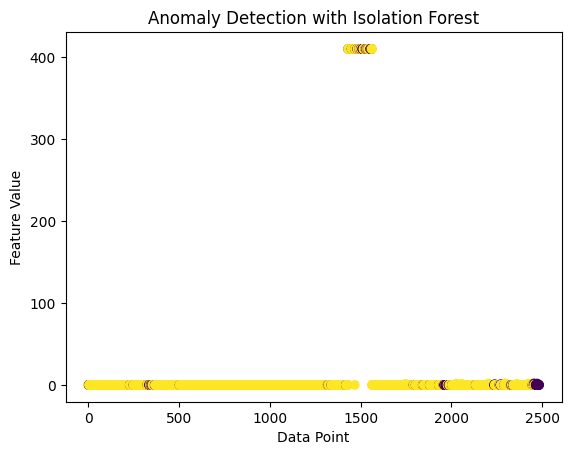

In [17]:
# Plot the data and highlight anomalies
plt.scatter(range(len(anomaly_column)), anomaly_column, c=predictions, cmap='viridis')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Data Point')
plt.ylabel('Feature Value')
plt.show()


In [31]:
 model.predict([[437.98, 722.  ,  34.  ,   6.06,   0.  ,   0.  ,  17.21,   0.  ,
         0.  , 430.  ,   0.  ]])

array([-1])